In [1]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing, cross_validation
%matplotlib inline
plt.style.use('ggplot')



# source directory path.
src_dir = r"C:\Users\chsoon\Desktop\airline_case\Monthly Data"

# create list of each file directory.
all_files = glob.glob(src_dir + "/*.csv")

# concatenate all files into single dataframe.
main_df = pd.DataFrame()
main_list = []
for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0)
    main_list.append(df)
main_df = pd.concat(main_list)

# lookup tables paths.
airport_id_dir = r"C:\Users\chsoon\Desktop\airline_case\Lookup Tables\L_AIRPORT_ID.csv"
carrier_hist_dir = r"C:\Users\chsoon\Desktop\airline_case\Lookup Tables\L_CARRIER_HISTORY.csv"

# create lookup table dataframes.
airport_id_df = pd.read_csv(airport_id_dir)
carrier_hist_df = pd.read_csv(carrier_hist_dir)

# merge all dataframes on airport id, unique carrier name. 
airport_id_df.rename(columns={'Code':'ORIGIN_AIRPORT_ID', 'Description':'AIRPORT_NAME'}, inplace=True)
main_df = pd.merge(main_df, airport_id_df, on='ORIGIN_AIRPORT_ID')
carrier_hist_df.rename(columns={'Code':'UNIQUE_CARRIER', 'Description':'CARRIER_HIST'}, inplace=True)
main_df = pd.merge(main_df, carrier_hist_df, on='UNIQUE_CARRIER')

# create new columns
# main_df["AIR_TIME_HOURS"] = main_df["AIR_TIME"] / 60
main_df['ACTUAL_DEP_DELAY'] = main_df['DEP_DELAY'] > 0
main_df['ACTUAL_ARR_DELAY'] = main_df['ARR_DELAY'] > 0

main_df.columns.values.tolist()

['FL_DATE',
 'UNIQUE_CARRIER',
 'AIRLINE_ID',
 'CARRIER',
 'TAIL_NUM',
 'FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'Unnamed: 50',
 'AIRPORT_NAME',
 'CARRIER_HIST',
 'ACTUAL_DEP_DELAY',
 'ACTUAL_ARR_DELAY']

In [ ]:
delays_df = main_df[['ARR_DELAY', 'DEP_DELAY']]

In [11]:
arr_dist = main_df[['ARR_DELAY', 'DISTANCE']]

In [8]:
taxi_in_dist = main_df[['DISTANCE', 'TAXI_IN']]

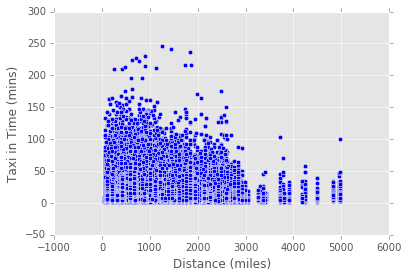

In [10]:
plt.scatter(taxi_in_dist['DISTANCE'], taxi_in_dist['TAXI_IN'])
plt.xlabel('Distance (miles)')
plt.ylabel('Taxi in Time (mins)')

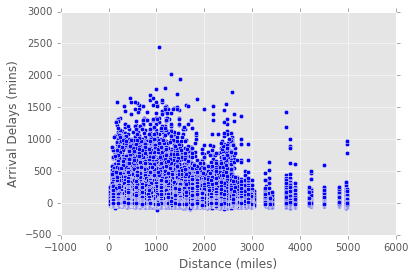

In [12]:
plt.scatter(arr_dist['DISTANCE'], arr_dist['ARR_DELAY'])
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delays (mins)')

In [15]:
# convert all values to numeric type, if not int64 or float.
taxi_in_dist.convert_objects(convert_numeric=True)
taxi_in_dist.fillna(0, inplace=True)

# function to handle non-numeric data.
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}  # empty dict of text and unique digits.
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != float:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1        
            df[column] = list(map(convert_to_int, df[column]))
        
    return df

taxi_in_dist = handle_non_numeric_data(taxi_in_dist)

C:\Users\chsoon\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\chsoon\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [16]:
clf = KMeans(n_clusters=2)
clf.fit(taxi_in_dist)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [32]:
centroids = clf.cluster_centers_
labels = clf.labels_

print centroids, labels

[[  535.35648276     6.9817458 ]
 [ 1818.18358388     7.68300596]] [0 0 0 ..., 1 1 1]


In [22]:
colors = ["g.", "r.", "c.", "b.", "k."]

In [33]:
for i in range(len(taxi_in_dist)):
    plt.plot(taxi_in_dist[i][0], taxi_in_dist[i][1], colors[labels[i]])

# plt.scatter(centroids[:,0], centroids[:,1])

KeyError: 0